<div align="center">
    
## Information Theory
</div>

#### Index

1. Information Content
2. Decision Tree and Entropy

#### 1. Information Content

: information theory is a field that quantifies the concept of abstract 'information' and studies the storage and communication of information.

**The book [Deep Learning](https://www.deeplearningbook.org/) by Goodfellow, Bengio and Courtville describes three conditions required to express information quantitatively.**

- The most likely event is that the information is low and there is no information in the event that happens.
- The less likely event is high information.
- When there are two independent events, the total amout of information is equal to the amount of each information.

When the probablility of an event **x** occurring is called **P(X=x)**, the information content **I(x)** of an event is defined as follows:

$$ I(x) = -\log_bP(x) $$

- The bottom b of the log uses values mainly 2, e, 10
- If b=2, the amount of infomation content is equal to the number of bits required to represent information.
- The figure below is a graph of **-logP(x)** for the value of **P(X)**(the natural logarithm in which the bottom is **e** is used)

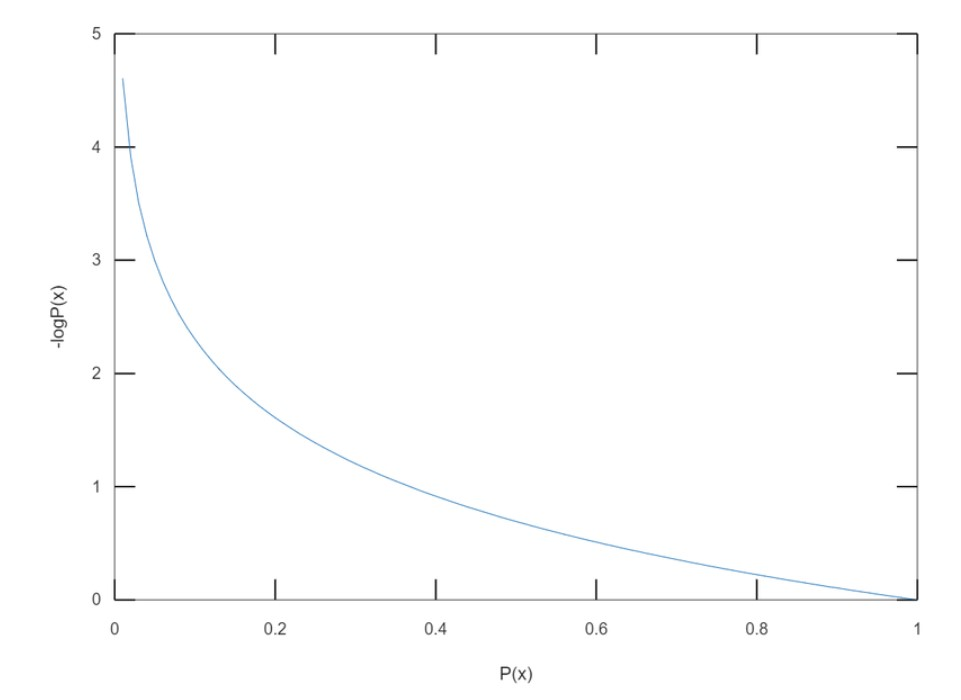

In [2]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수입니다. 숫자를 바꾸면서 실험해보세요!
total = 1000

#---------------#

count = 1   # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 95
information content: 4.564348191467836


: The lower the probability of happening, the more information content it is.

#### 2. Decision Tree and Entropy

: The Decision tree is a model in which the concept of entropy is actively used.

**The figure below is data that shows whether or not hte sport is played according to the weather. With the exception of Day, there are four data columns, including: Play(Yes/No) columns, which will serve as labels:**

- Outlook: Overall Weather(Sunny, Overcast, Rainy)
- Temperature: celestial temperature
- Humidity: humidity information(%) and categorical Transformation(high, normal)
- Wind: True, False

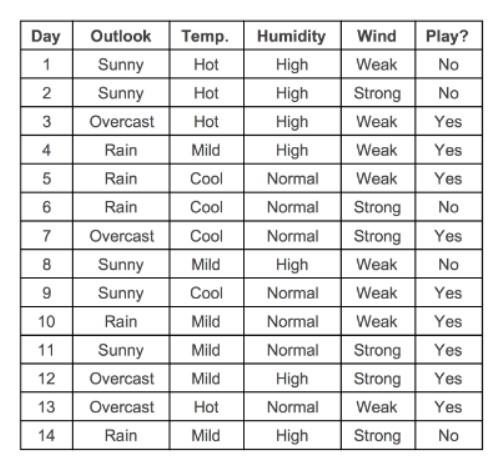

The decision tree is based on what criteria the entire data has, and it is considered that if the entropy decreases, the information gain inside the model is obtained. It's the opposite of what we define as an increase in entropy as an informaion loss.

$$ IG(S,F) = e(S) - \sum_{f\in F}\frac{|S_f|}{|S|}e(S_f) $$

- S: 전체 사건의 집합
- F: 분류 기준으로 고려되는 속성(feature)의 집합
- f는 F에 속하는 속성 (예를 들어 F가 Outlook일때, f는 Sunny, Overcast, Rainy중 하나가 될 수 있다.
- Sf: f속성을 가진 S의 부분집합
- |X|: 집합 X의 크기(원소의 개수)
- e(X): X라는 사건 집합이 지닌 엔트로피

The above formula IG(S, F) refers to the value that subtracted the entropy when selecting the classification criteria called F to the entropy of the entire event: the amount of information gain obtained through the adoption of classification criteria.

- Of the total 14 cases, 9 times are played, and 5 times are not played.

$$ e(S) = - (\frac{9}{14}log_2\frac{9}{14} + \frac{5}{14}log_2\frac{5}{14}) = 0.94 $$ 

- get the entropy when the F is Outlook, that is, when the f is one of Sunny, Overcast, Rainy.

$$ e(S_{Sunny}) = - (\frac{2}{5}log_2\frac{2}{15} + \frac{3}{5}log_2\frac{3}{5}) = 0.97 $$ 

$$ e(S_{Overcast}) = - (\frac{4}{4}log_2\frac{4}{4} + \frac{0}{4}log_2\frac{0}{4}) = 0 $$ 

$$ e(S_{Rainy}) = - (\frac{3}{5}log_2\frac{3}{5} + \frac{2}{5}log_2\frac{2}{5}) = 0.97 $$ 

The information gain at this time is as follows.

$$ \sum_{f\in F}\frac{|S_f|}{|S|}e(S_f) 
= \frac{5}{14}e(S_{Sunny} + \frac{4}{14}e(S_{Overcast} + \frac{5}{14}e(S_{Rainy} 
= \frac{5}{14}0.97 + \frac{4}{14}0 + \frac{5}{14}0.97 
= 0.69 $$

- **Practice Using [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) provided by kaggle**

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
csv_path = 'diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# Decision Tree 모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the reponse for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


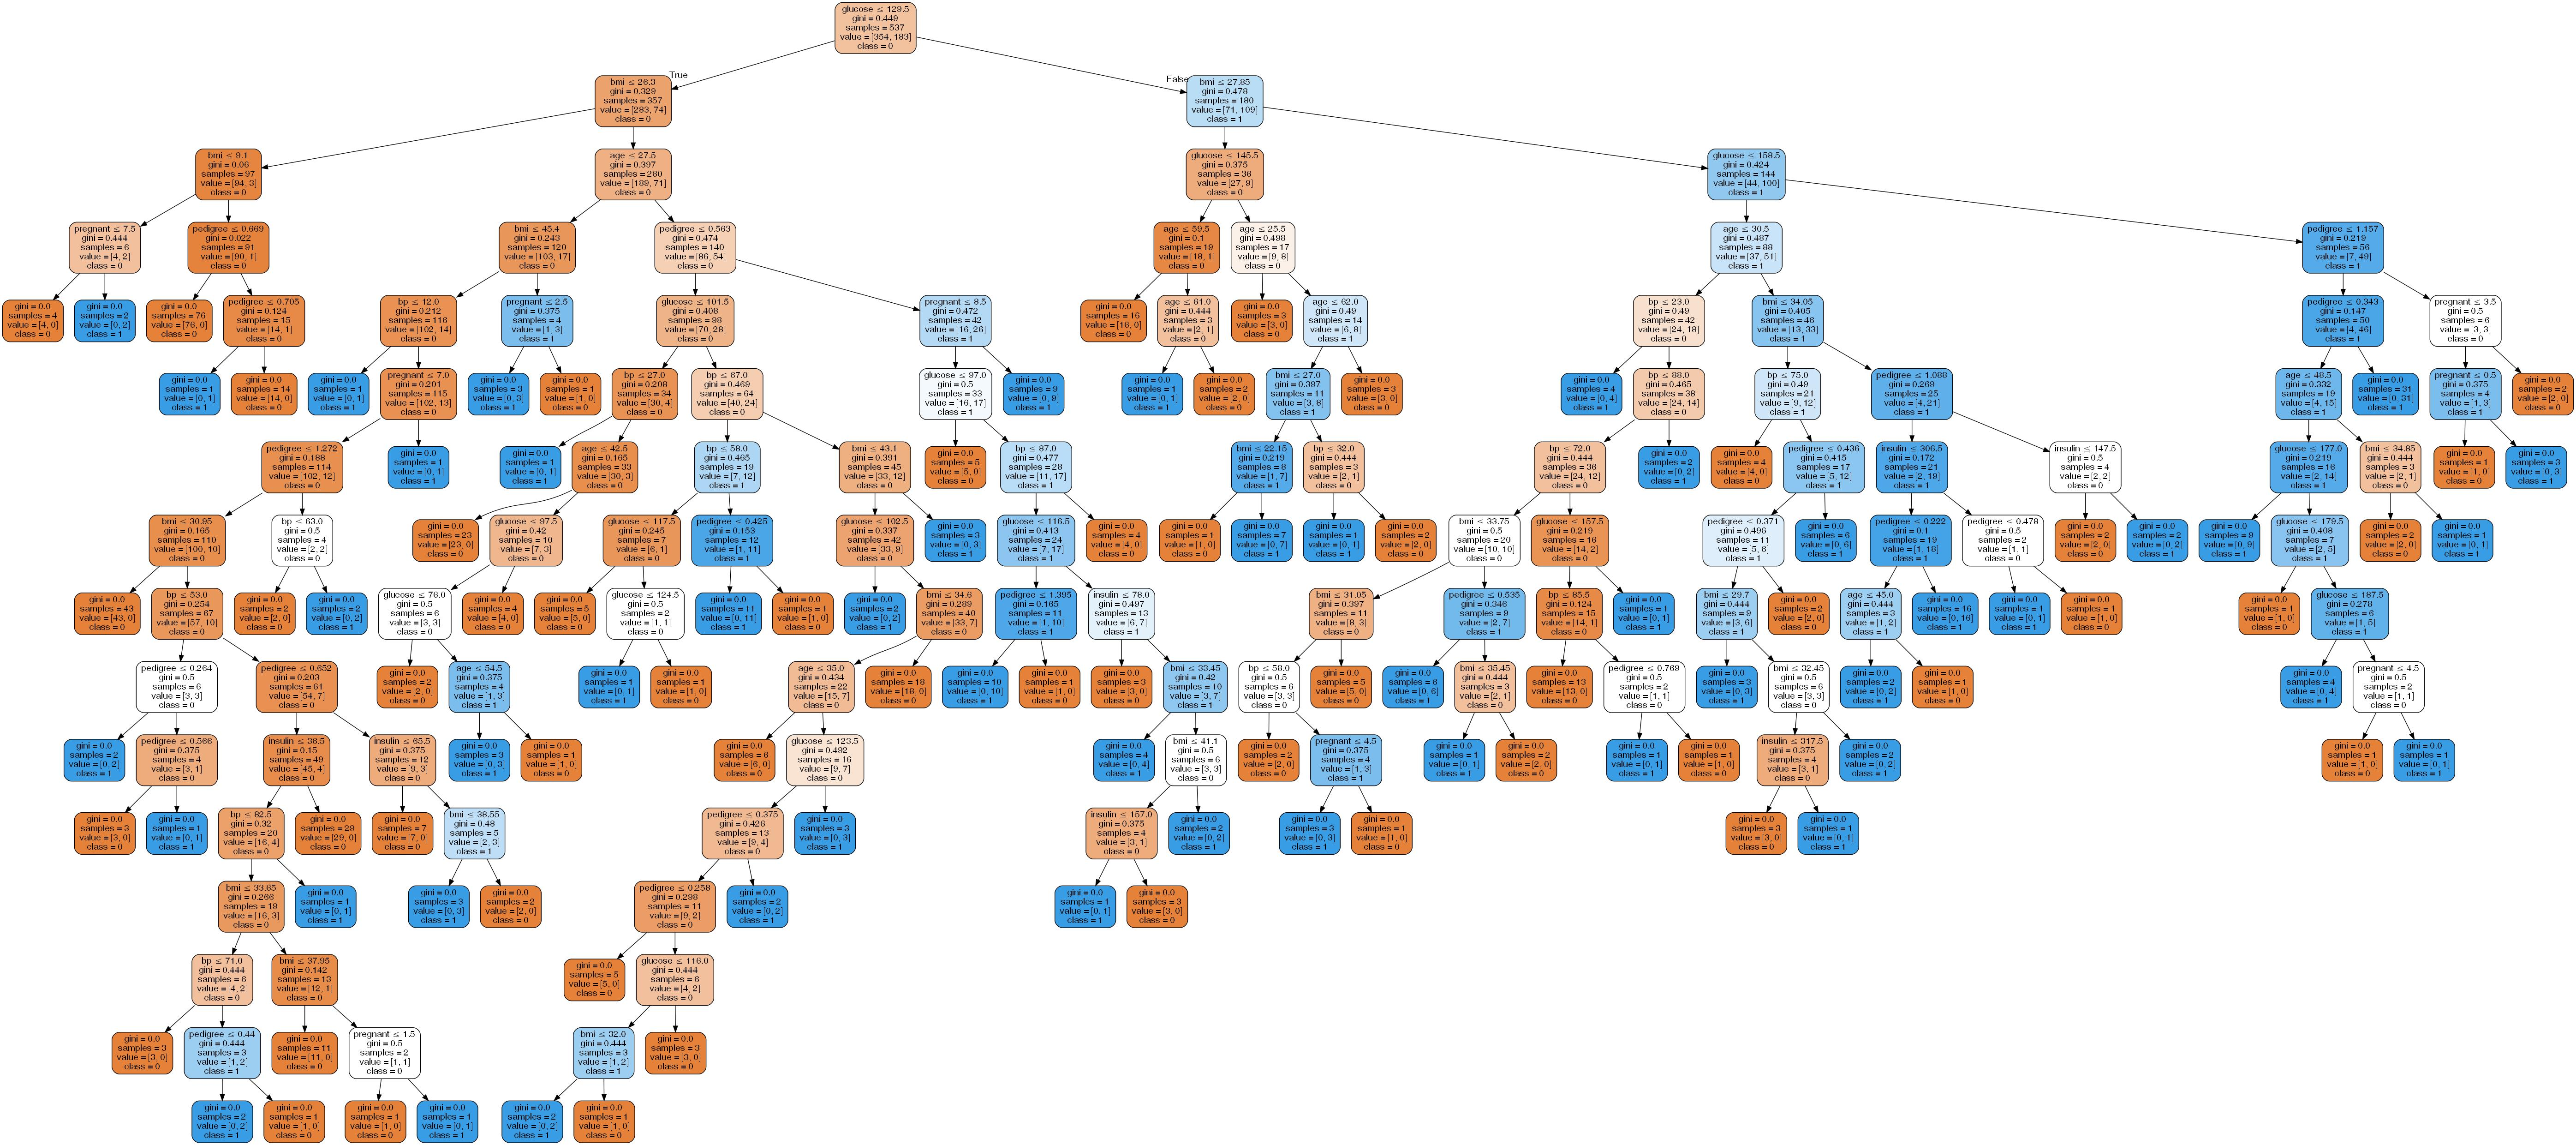

In [8]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Decision tree model 시각화
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import pydot

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes1.png')
Image(graph.create_jpg(), retina=True)

이때 사용한 정보의 총량을 한번 확인해보자

사용되지 않은 정보가 적을 수록 많은 정보를 사용한 것일 테니, 정보 이득이 되지 않은 Impurity를 측정해보면 될 듯하다.

In [9]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.1550418448388093
0.14463309851254125


위 두 가지 사실을 볼 때 학습시킨 Decision Tree는 정보 이득을 최대화할 수 있는 지점까지 극한적으로 많은 분류 기준을 적용한 경우임을 알 수 있다. 이것이 과연 타당한지 비교군 실험으로 확인해보겠다.

In [10]:
# Decision Tree를 3depth까지만 발전 시켜서 확인해보자.
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


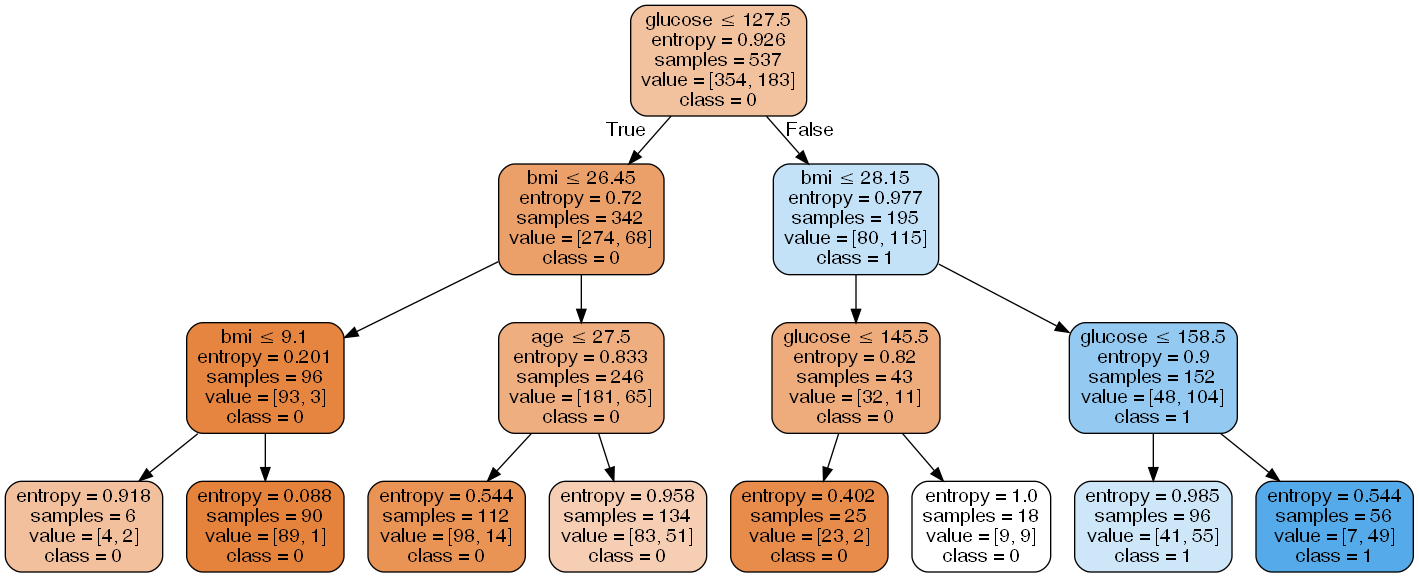

In [11]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [12]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323


엔트로피 기준으로 더욱 정보 이득을 얻을 수 있음에도 불구하고 분류 기준을 더 세우지 않는 것이 전체 모델의 정확도 향상에 낫다는 것을 알 수 있다.

이는 Decision Tree의 분류 기준을 임의로 정한 것이기 때문으로 예상된다. 무한정 기준을 쪼개서 엔트로피를 떨어뜨릴 수 잇지만, 결국 overfitting의 결과를 낳게 된다는 사실을 예상해 볼 수 있다.

앙상블한 Random Forest모델이 이러한 문제점을 해결한 모델이므로 한번 이 모델을 갖고 실험을 해보는 것도 좋을 듯 싶다.